# 군집분석

In [ ]:
'''
# 군집(Clustering) 분석
  : 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은
    클러스터(집단)로 묶는 알고리즘
  : 각각의 클러스터는 서로 완전하게 구분되는 특징을 갖기 때문에 어느 클러스터에도 속하지 못 하는 
    관측값이 존재할 수 있음. 이런 특성을 이용하면 특이 데이터(이상값, 중복값 등)를 찾는데 활용하기도 함

# 비지도 학습 유형
  : 관측값을 여러 집단으로 나눈다는 점은 분류와 비슷하나, 정답이 없는 상태에서 
    데이터 자체의 유사성을 바탕으로 판단한다는 점에서 분류와 차이가 있음
  
  : ex) 신용카드 부정 사용 탐지, 구매 패턴 분석 등 소비자 행동 특성 그룹화 ..


  
    
'''

## K-Means 알고리즘

In [ ]:
'''
# K-Means : 데이터 간의 유사성을 측정하는 기준으로 각 클러스터 중심까지의 거리를 이용
          : 벡터 공간에 데이터들이 있고 k개 클러스터가 있을 때 클러스터 중심까지의 거리가 
            가장 가까운 클러스터로 데이터를 할당하는 방식
# 모형의 성능 : K 값에 따라 달라짐
             : 일반적으로 K가 클수록 모형의 정확도는 개선되지만, 너무 많으면?
               선택지가 너무 많아지므로 분석의 효과가 줄어들게 됨
'''

In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [7]:
# 데이터 로딩
# 도매업 고객 데이터셋 : 각 고객의 연간 구매금액을 상품 카테고리별로 구별하여 정리
df = pd.read_csv('data/Wholesale customers data.csv', header=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
# 데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [11]:
# 전처리
# 분석에 사용할 속성 선택 - 비지도학습유형에서 군집분석을 할 것이므로 전체가 설명변수이면 됨
X = df.iloc[:, :]
X[:5]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
# 설명변수 데이터를 정규화
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

X[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [18]:
# K-Means를 통한 군집 모형
from sklearn.cluster import KMeans

# n_clusters : 클러스터 개수 지정
# n_init : centroid seeds 지정, default=10
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)

kmeans.fit(X)

KMeans(n_clusters=5)

In [22]:
# 군집이 어떻게 되었는지 확인
cluster_labels = kmeans.labels_
cluster_labels

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 3, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 4, 0, 0, 2, 2, 0, 0, 2, 2, 4, 0, 2, 2, 0, 4, 0, 0, 2, 4,
       2, 0, 2, 2, 2, 3, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 4, 4, 3,
       2, 2, 2, 2, 4, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 4, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0,

In [23]:
# 군집 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_labels
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


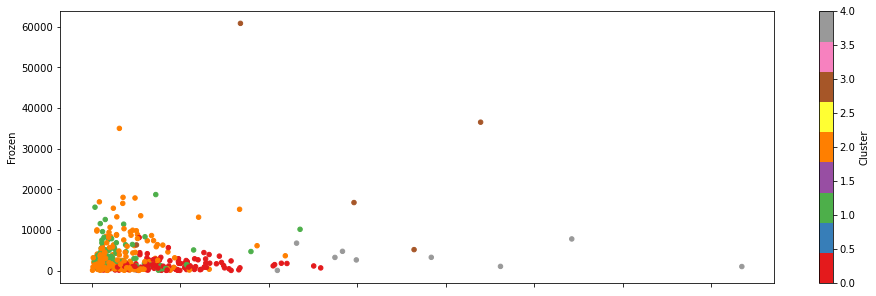

In [25]:
# 시각화
df.plot(kind='scatter', x='Milk', y='Frozen', c='Cluster', colorbar=True, figsize=(16, 5),
       cmap='Set1')
plt.show()
plt.close()

## DBSCAN 알고리즘

In [26]:
'''
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
  : 데이터가 위치하고 있는 공간 밀집도를 기준으로 클러스터를 구분
'''

'\n# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)\n'

In [27]:
import pandas as pd
import folium 

In [28]:
# 데이터 로딩
df = pd.read_excel('data/2016_middle_shcool_graduates_report.xlsx', header=0)
df.head()

,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,...,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,...,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,...,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,...,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,...,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,...,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900


In [29]:
# 데이터 정리
df = df.drop(columns='Unnamed: 0')
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900


In [ ]:
# 고등학교 진학데이터를 활용해서 속성이 비슷한 중학교끼리 군집화

In [30]:
# 데이터 탐색 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야      415 non-null    object 
 5   남학생수    415 non-null    int64  
 6   여학생수    415 non-null    int64  
 7   일반고     415 non-null    float64
 8   특성화고    415 non-null    float64
 9   과학고     415 non-null    float64
 10  외고_국제고  415 non-null    float64
 11  예고_체고   415 non-null    float64
 12  마이스터고   415 non-null    float64
 13  자사고     415 non-null    float64
 14  자공고     415 non-null    float64
 15  기타진학    415 non-null    float64
 16  취업      415 non-null    int64  
 17  미상      415 non-null    float64
 18  위도      415 non-null    float64
 19  경도      415 non-null    float64
dtypes: float64(12), int64(4), object(4)
memory usage: 65.0+ KB


In [33]:
# 데이터 전처리
# 지역, 코드, 유형, 주야 변환
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

location = label_encoder.fit_transform(df['지역'])
code = label_encoder.fit_transform(df['코드'])
stype = label_encoder.fit_transform(df['유형'])
day = label_encoder.fit_transform(df['주야'])

df['location'] = location
df['code'] = code
df['type'] = stype
df['day'] = day

df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,...,자공고,기타진학,취업,미상,위도,경도,location,code,type,day
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,...,0.000,0.004,0,0.000,37.594942,127.038909,16,0,1,0
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,...,0.004,0.031,0,0.000,37.577473,127.003857,22,0,1,0
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,...,0.003,0.009,0,0.003,37.491637,127.071744,0,0,0,0
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,...,0.000,0.019,0,0.000,37.480439,127.062201,0,0,0,0
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,...,0.000,0.010,0,0.000,37.510750,127.008900,14,0,0,0


In [34]:
# 군집 모델
from sklearn.cluster import DBSCAN

# 분석에 사용할 모델 선택 (과학고, 외고-국제고, 자사고)
columns_list = [9, 10, 13]
X = df.iloc[:, columns_list]
X[:5]

,과학고,외고_국제고,자사고
0,0.018,0.007,0.227
1,0.000,0.035,0.043
2,0.009,0.012,0.090
3,0.013,0.013,0.065
4,0.007,0.010,0.282


In [35]:
# 설명 변수 데이터를 정규화
X = StandardScaler().fit(X).transform(X)

# DBSCAN 알고리즘으로 학습
dbm = DBSCAN(eps=0.2, min_samples=5)

dbm.fit(X)

DBSCAN(eps=0.2)

In [37]:
# 군집화 확인
cluster_labels = dbm.labels_
cluster_labels

# 결과중 -1은 Noise

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  2, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
        0,  3, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  1,  0, -1, -1, -1,
        0, -1, -1, -1, -1,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,
       -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0,  2,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0, -1, -1,  0, -1,  0, -1,  0,  0, -1, -1, -1,
       -1,  1,  0, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  1,
       -1, -1,  0,  2,  0, -1, -1,  1, -1, -1, -1,  0,  0,  0, -1, -1,  0,
       -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,
        0, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1, -1, -1, -1,
       -1,  0, -1, -1, -1,  1,  0,  3,  1, -1,  0,  0, -1,  0, -1, -1,  0,
        0,  2, -1, -1,  3,  0,  0, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0,
        0,  0, -1, -1,  0, -1, -1, -1, -1, -1,  2,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [38]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_labels
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,...,기타진학,취업,미상,위도,경도,location,code,type,day,Cluster
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,...,0.004,0,0.000,37.594942,127.038909,16,0,1,0,-1
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,...,0.031,0,0.000,37.577473,127.003857,22,0,1,0,-1
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,...,0.009,0,0.003,37.491637,127.071744,0,0,0,0,-1
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,...,0.019,0,0.000,37.480439,127.062201,0,0,0,0,-1
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,...,0.010,0,0.000,37.510750,127.008900,14,0,0,0,-1


In [44]:
# 클러스터 기준으로 그룹화해서 그룹별로 내용 출력
group_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')

for group, info in grouped:
    print('group : ', group)
    print(info.iloc[:, group_cols].head())
    print('--------------------------------')

group :  -1
    지역               학교명  유형    과학고  외고_국제고    자사고
0  성북구    서울대학교사범대학부설중학교  국립  0.018   0.007  0.227
1  종로구  서울대학교사범대학부설여자중학교  국립  0.000   0.035  0.043
2  강남구             개원중학교  공립  0.009   0.012  0.090
3  강남구             개포중학교  공립  0.013   0.013  0.065
4  서초구             경원중학교  공립  0.007   0.010  0.282
--------------------------------
group :  0
     지역      학교명  유형  과학고  외고_국제고    자사고
13  서초구  동덕여자중학교  사립  0.0   0.022  0.038
22  강남구    수서중학교  공립  0.0   0.019  0.044
28  서초구    언남중학교  공립  0.0   0.015  0.050
34  강남구    은성중학교  사립  0.0   0.016  0.065
43  송파구    거원중학교  공립  0.0   0.021  0.054
--------------------------------
group :  1
       지역      학교명  유형  과학고  외고_국제고    자사고
46    강동구    동신중학교  사립  0.0     0.0  0.044
103   양천구    신원중학교  공립  0.0     0.0  0.006
118   구로구    개봉중학교  공립  0.0     0.0  0.012
126  영등포구    대림중학교  공립  0.0     0.0  0.050
175   중랑구  혜원여자중학교  사립  0.0     0.0  0.004
--------------------------------
group :  2
      지역    학교명  유형    과학고  외고_국제고    자사고
20  

In [50]:
# 시각화
colors = {-1 : 'gray', 0 : 'coral', 1 : 'blue', 2 : 'green', 3 : 'red', 4 : 'purple'}

cluster_map = folium.Map(location=[37.56, 126.97], tiles='Stamen Terrain', zoom_start=13)

for name, lat, lng, cluster in zip(df.학교명, df.위도, df.경도, df.Cluster):
    folium.CircleMarker([lat, lng],
                      radius=5,
                      color=colors[cluster
                                    ],
                      fill=True,
                      fill_color=colors[cluster], 
                      fill_opacity=0.6,
                      popup=name
                      ).add_to(cluster_map)
    
cluster_map